In [1]:
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

plt.rcParams["figure.figsize"] = (40,40)

import warnings
warnings.filterwarnings('ignore')
from datetime import datetime 

In [2]:
df = pd.read_pickle("datos/bikes_clean_pickle.pkl")
df.head()

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
0,2018-01-01,winter,0,1,Holiday,Monday,Workingday,2,14.110847,80.5833,10.749882,331,654
1,2018-01-02,winter,0,1,Not Holiday,Tuesday,Workingday,2,14.902598,69.6087,16.652113,131,670
2,2018-01-03,winter,0,1,Not Holiday,Wednesday,Workingday,1,8.050924,43.7273,16.636703,120,1229
3,2018-01-04,winter,0,1,Not Holiday,Thursday,Workingday,1,8.200000,59.0435,10.739832,108,1454
4,2018-01-05,winter,0,1,Not Holiday,Friday,Workingday,1,9.305237,43.6957,12.522300,82,1518


In [3]:
df.sample(10)

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
643,2019-10-06,autumn,1,10,Not Holiday,Sunday,Weekend or Holiday,1,22.720847,66.4167,17.957675,3031,4934
576,2019-07-31,summer,1,7,Not Holiday,Wednesday,Workingday,1,29.246653,70.4167,11.083475,968,6248
39,2018-02-09,winter,0,2,Not Holiday,Friday,Workingday,2,5.526103,49.4783,12.652213,53,1552
348,2018-12-15,autumn,0,12,Not Holiday,Saturday,Weekend or Holiday,2,17.322500,63.4167,17.958814,181,3528
336,2018-12-03,autumn,0,12,Not Holiday,Monday,Workingday,1,12.265847,61.2917,6.417481,706,2908
693,2019-11-25,autumn,1,11,Not Holiday,Monday,Workingday,1,10.079153,46.8333,10.083500,309,2115
327,2018-11-24,autumn,0,11,Not Holiday,Saturday,Weekend or Holiday,1,15.306653,54.9167,11.209368,560,935
668,2019-10-31,autumn,1,10,Not Holiday,Thursday,Workingday,2,14.657500,66.6667,11.166689,419,5147
255,2018-09-13,summer,0,9,Not Holiday,Thursday,Workingday,1,26.684153,71.2500,9.500868,701,4062
410,2019-02-15,winter,1,2,Not Holiday,Friday,Workingday,1,14.281653,53.1250,12.167200,141,4028


In [4]:
# cal = calendar() #llamada al calendario
# holidays = cal.holidays(start=df['date'].min(), end=df['date'].max())

# df['holiday'] = df['date'].isin(holidays)

In [5]:
# festivos = df[df['holiday'] == True]
# festivos

In [6]:
#festivos.shape

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   year        730 non-null    int64         
 3   month       730 non-null    int64         
 4   holiday     730 non-null    object        
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    object        
 7   weather     730 non-null    int64         
 8   temp        730 non-null    float64       
 9   hum         730 non-null    float64       
 10  windspeed   730 non-null    float64       
 11  casual      730 non-null    int64         
 12  registered  730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 79.8+ KB


In [8]:
df.sample(10)

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
607,2019-08-31,summer,1,8,Not Holiday,Saturday,Weekend or Holiday,1,31.330847,58.7500,11.291711,1433,5917
21,2018-01-22,winter,0,1,Not Holiday,Monday,Workingday,1,2.424346,40.0000,11.521990,93,888
4,2018-01-05,winter,0,1,Not Holiday,Friday,Workingday,1,9.305237,43.6957,12.522300,82,1518
344,2018-12-11,autumn,0,12,Not Holiday,Tuesday,Workingday,1,9.054153,49.0000,4.458294,377,2366
351,2018-12-18,autumn,0,12,Not Holiday,Tuesday,Workingday,1,9.771653,58.6250,11.375193,220,2211
571,2019-07-26,summer,1,7,Not Holiday,Friday,Workingday,1,31.843347,59.6667,19.082471,1036,5825
131,2018-05-12,spring,0,5,Not Holiday,Saturday,Weekend or Holiday,1,21.935000,74.7500,12.707689,695,4169
152,2018-06-02,spring,0,6,Not Holiday,Saturday,Weekend or Holiday,1,29.315000,30.5000,19.583229,736,4232
261,2018-09-19,summer,0,9,Not Holiday,Wednesday,Workingday,2,22.515847,69.0000,10.166714,691,3848
286,2018-10-14,autumn,0,10,Not Holiday,Sunday,Weekend or Holiday,2,22.584153,71.6250,15.000161,529,3115


In [9]:
df['holiday'].value_counts()

Not Holiday    710
Holiday         20
Name: holiday, dtype: int64

In [10]:
df.groupby('holiday')['registered', 'casual'].mean().reset_index()


,holiday,registered,casual
0,Holiday,2542.450000,1381.100000
1,Not Holiday,3690.202817,834.267606


In [11]:
df.groupby('holiday')['registered', 'casual'].median().reset_index()

,holiday,registered,casual
0,Holiday,2774.5,1355.0
1,Not Holiday,3694.5,711.5


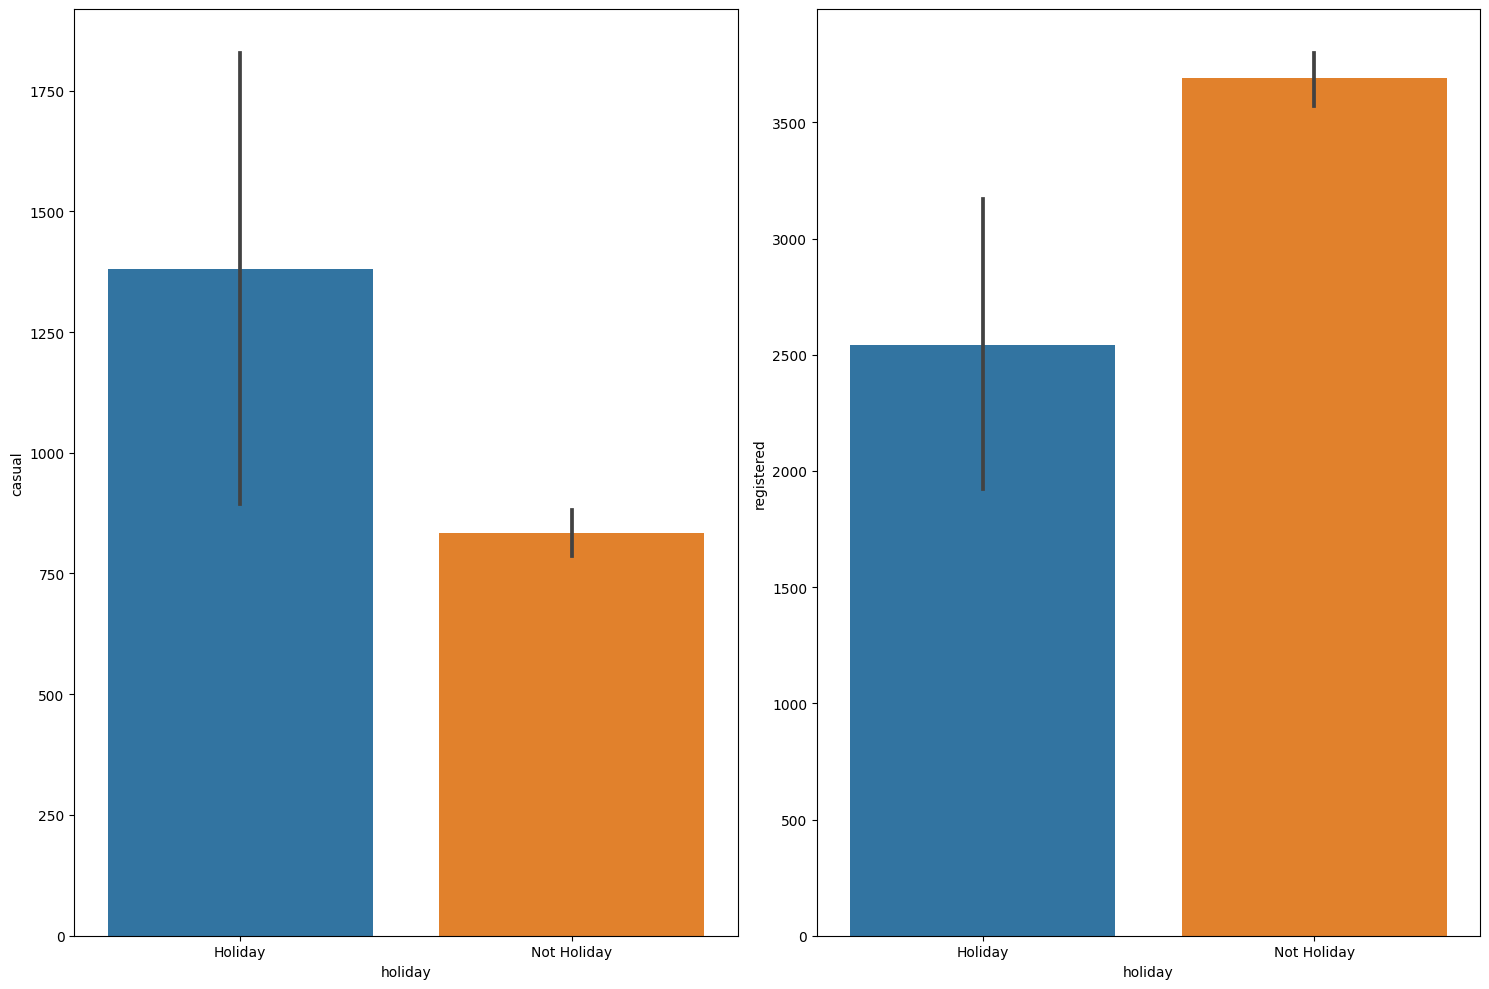

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15,10))

axes = axes.flat

for indice, columna in enumerate(df.columns[-2:]):

    sns.barplot(x = 'holiday', y =df[columna], data=df, ax= axes[indice])

plt.tight_layout();


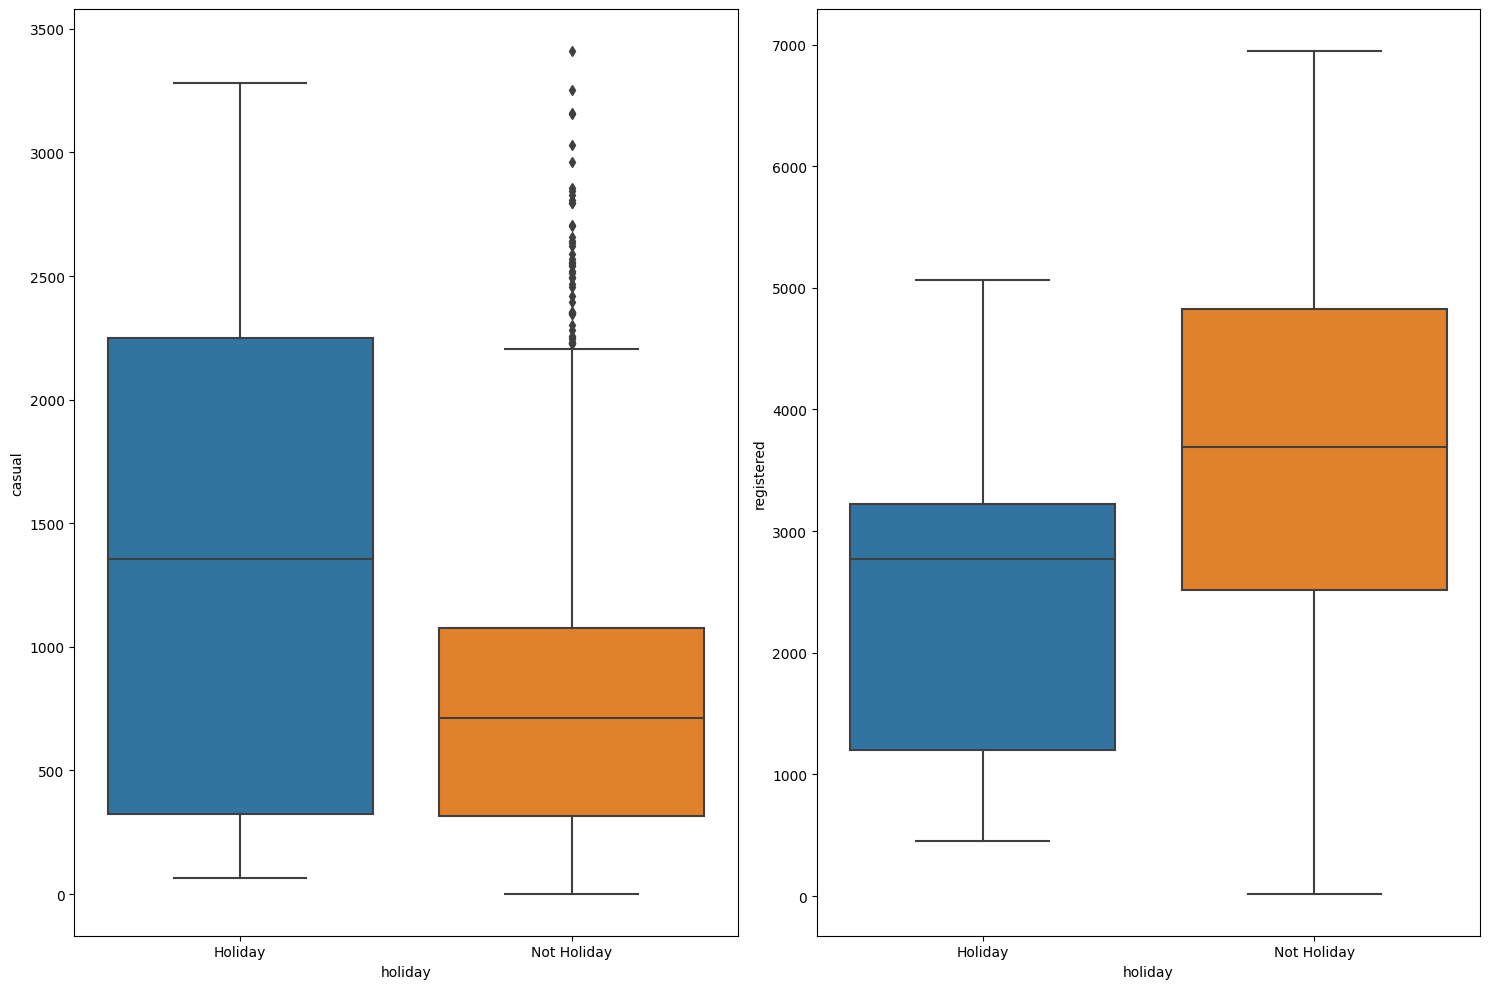

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15,10))

axes = axes.flat

for indice, columna in enumerate(df.columns[-2:]):

    sns.boxplot(x = 'holiday', y =df[columna], data=df, ax= axes[indice])

plt.tight_layout();

In [14]:
#df['holiday'] =0

In [15]:
#lista_festivos_bien = ['2018-01-01' ,'2018-01-15', '2018-02-19', '2018-04-01', '2018-04-16','2018-05-13', '2018-05-28', '2018-06-17','2018-07-04', '2018-09-03', '2018-10-08', '2018-11-12', '2018-11-22', '2018-12-05', '2018-12-24','2018-12-25', '2019-01-01', '2019-01-21', '2019-04-16', '2019-04-21','2019-05-12', '2019-05-27', '2019-06-16','2019-07-04', '2019-09-02', '2019-10-14', '2019-11-28', '2019-12-24', '2019-12-25']

In [16]:
#df.loc[df['dteday'].isin(lista_festivos_bien), "holiday"] = 1

In [17]:
#df['holiday'].value_counts()

In [18]:
df["weekday"]= df["date"].dt.day_name()

In [19]:
df.sample(10)

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
523,2019-06-08,spring,1,6,Not Holiday,Saturday,Weekend or Holiday,1,26.615847,46.7917,11.750661,1488,6248
688,2019-11-20,autumn,1,11,Not Holiday,Wednesday,Workingday,2,15.340847,68.5000,5.542575,534,5100
260,2018-09-18,summer,0,9,Not Holiday,Tuesday,Workingday,1,20.807500,69.5000,11.958361,1353,2921
143,2018-05-24,spring,0,5,Not Holiday,Thursday,Workingday,2,27.060000,74.0833,13.875164,659,3833
520,2019-06-05,spring,1,6,Not Holiday,Wednesday,Workingday,2,22.174153,61.3333,14.041525,968,6033
658,2019-10-21,autumn,1,10,Not Holiday,Monday,Workingday,1,19.030847,51.0000,11.125618,2132,4692
38,2018-02-08,winter,0,2,Not Holiday,Thursday,Workingday,1,9.054153,53.7917,24.250650,64,1466
182,2018-07-02,summer,0,7,Not Holiday,Monday,Workingday,1,30.271653,44.4583,7.709154,2204,2915
194,2018-07-14,summer,0,7,Not Holiday,Saturday,Weekend or Holiday,1,27.914153,47.6250,16.124689,888,4196
121,2018-05-02,spring,0,5,Not Holiday,Wednesday,Workingday,2,22.515847,73.0000,12.291418,847,3554


In [20]:
df['weather'].value_counts()

1    463
2    246
3     21
Name: weather, dtype: int64

In [21]:
df.groupby('weather')['registered', 'casual'].mean().reset_index()

,weather,registered,casual
0,1,3912.755940,964.030238
1,2,3354.930894,689.882114
2,3,1617.809524,185.476190


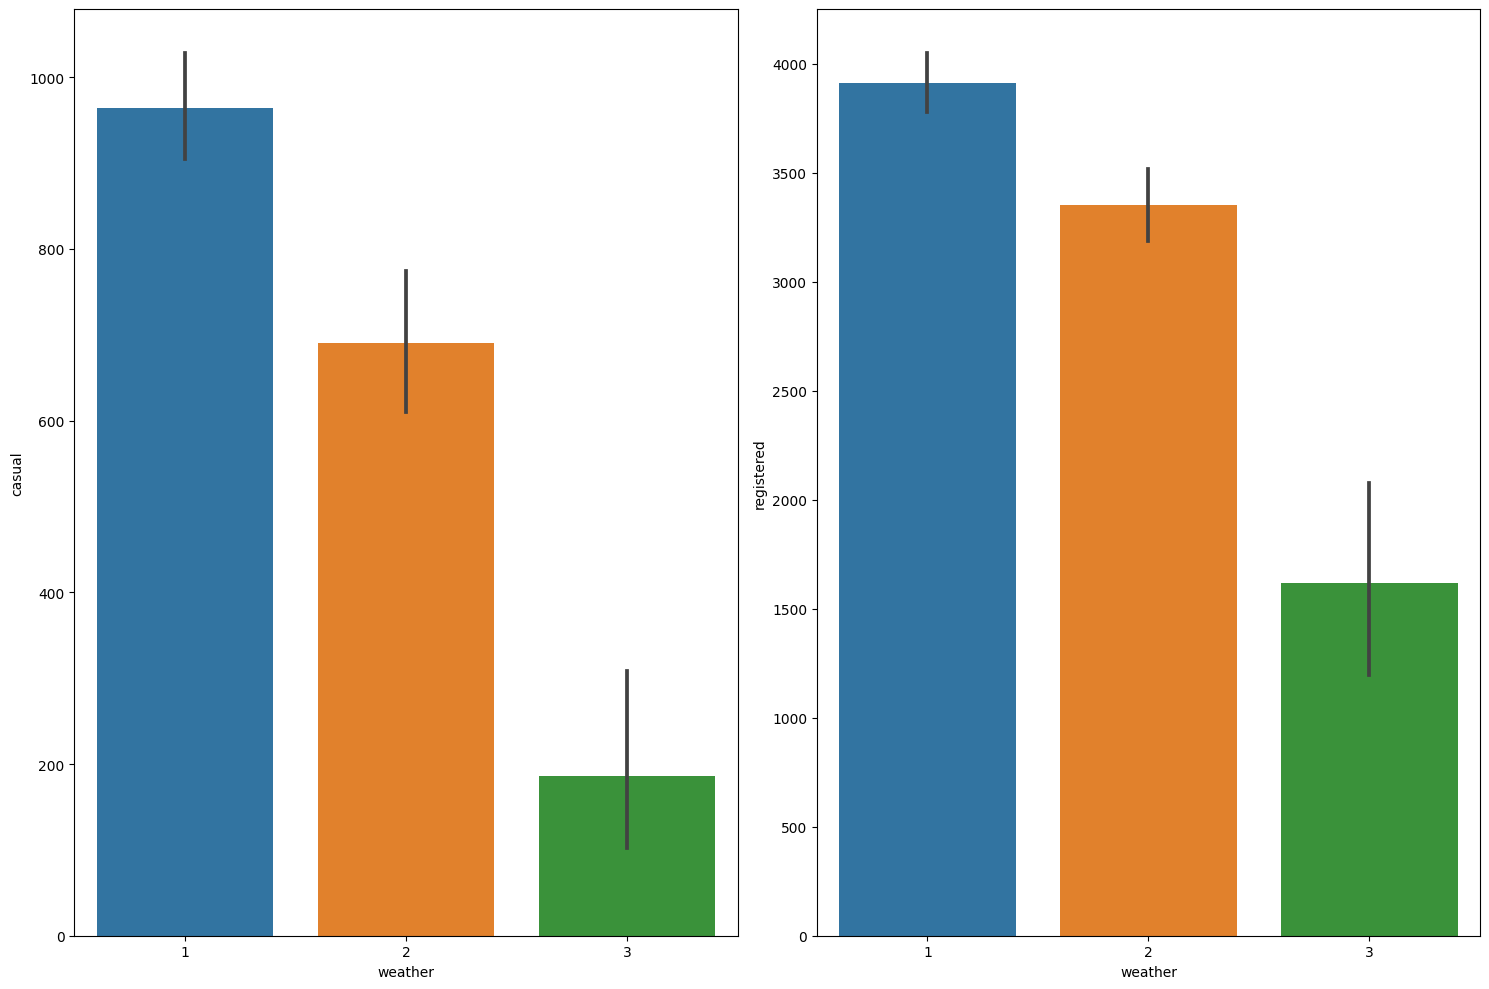

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15,10))

axes = axes.flat

for indice, columna in enumerate(df.columns[-2:]):

    sns.barplot(x = 'weather', y =df[columna], data=df, ax= axes[indice])

plt.tight_layout();

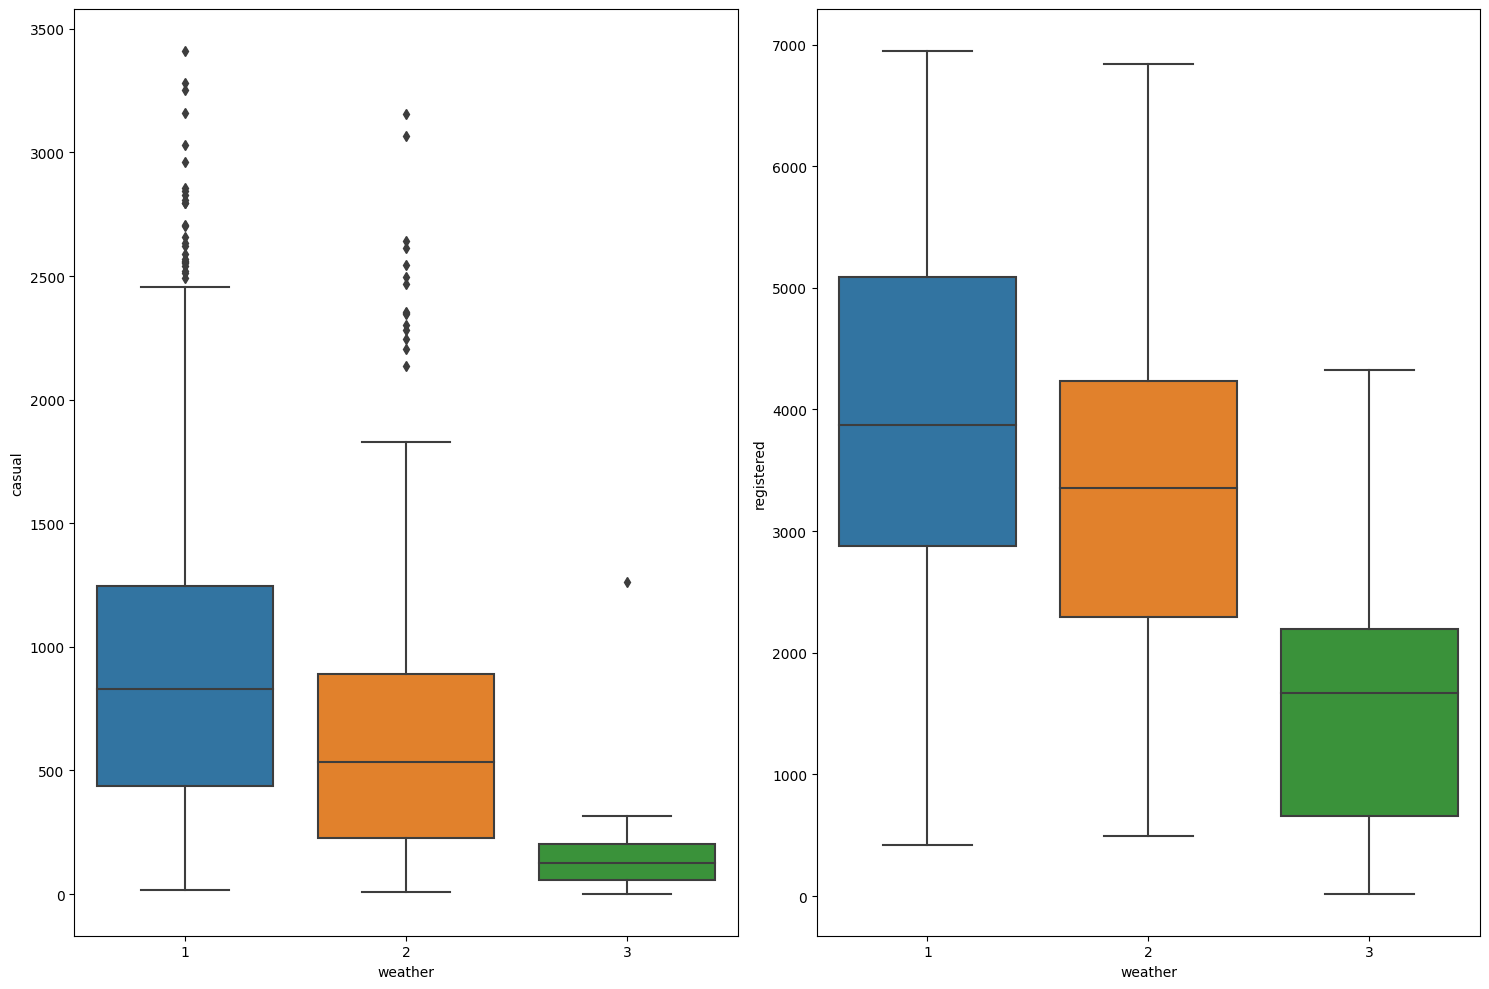

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15,10))

axes = axes.flat

for indice, columna in enumerate(df.columns[-2:]):

    sns.boxplot(x = 'weather', y =df[columna], data=df, ax= axes[indice])

plt.tight_layout();

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   year        730 non-null    int64         
 3   month       730 non-null    int64         
 4   holiday     730 non-null    object        
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    object        
 7   weather     730 non-null    int64         
 8   temp        730 non-null    float64       
 9   hum         730 non-null    float64       
 10  windspeed   730 non-null    float64       
 11  casual      730 non-null    int64         
 12  registered  730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 79.8+ KB


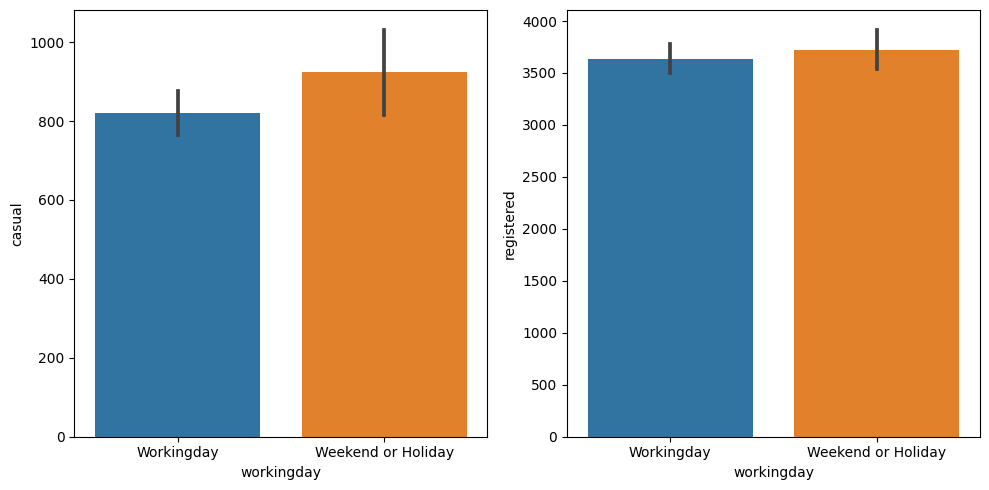

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes = axes.flat

for indice, columna in enumerate(df.columns[-2:]):
    # para trazar una línea de densidad
    sns.barplot(x='workingday', y=df[columna], data=df, ax=axes[indice])

plt.tight_layout()

In [26]:
# True es laborable, False es fines de semana y festivos
df.workingday.value_counts()

Workingday            522
Weekend or Holiday    208
Name: workingday, dtype: int64

para el map de workingday

In [27]:
estad = df.describe().T
estad

,count,mean,std,min,25%,50%,75%,max
year,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
month,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
weather,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021
casual,730.0,849.249315,686.479875,2.000000,316.250000,717.000000,1096.500000,3410.000000
registered,730.0,3658.757534,1559.758728,20.000000,2502.250000,3664.500000,4783.250000,6946.000000


In [28]:
df_workingday = df.groupby('workingday')['casual', 'registered'].median()
df_workingday

,casual,registered
workingday,,
Weekend or Holiday,722.0,3798.0
Workingday,717.0,3595.5


haciendo la proporción entre las medias de las categorías

In [29]:
mapa_wd_casual = {False: 1, True: (df_workingday.iloc[1,0] / df_workingday.iloc[0,0])}
mapa_wd_registered = {False: (df_workingday.iloc[0,1] / df_workingday.iloc[1,1]), True: 1}

In [30]:
mapa_wd_casual

{False: 1, True: 0.9930747922437673}

In [31]:
mapa_wd_registered

{False: 1.0563204005006257, True: 1}

considerando la media global

In [32]:
# si ajustamos en base a las medias de cada categoría de 'workingday' respecto a la media global de esa columna paralos casos de 'casual' y 'registered':
mapa_wd_casual = {False: (df_workingday.iloc[0,0] / estad.loc['casual', '50%']), True: (df_workingday.iloc[1,0] / estad.loc['casual', '50%'])}
mapa_wd_registered = {False: (df_workingday.iloc[0,1] / estad.loc['registered', '50%']), True: (df_workingday.iloc[1,1] / estad.loc['registered', '50%'])}

In [33]:
mapa_wd_casual

{False: 1.0069735006973501, True: 1.0}

In [34]:
mapa_wd_registered

{False: 1.0364306180925091, True: 0.981170691772411}